In [1]:
from pandas import read_csv
from matplotlib.pyplot import subplots, yticks, legend, rcParams
from numpy import arange, linspace, zeros

from scipy.fftpack import fft


In [2]:
df = read_csv("../data/EEG_absence.txt", delim_whitespace=True) 

sr = 256
duration = 5

df_np = df.to_numpy()

data = df_np[:duration*sr, :2]

df.head()

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,Pz,A1,A2,EKG,ATM,EO1,EO2,EM1,EM2,PHO
0,-6.9732,30.00060,60.9815,-23.047,167.433,129.4360,262.942,195.607,248.130,235.684,...,270.738,-3.48050,-1.26900,-1.3564,24.0488,20.9428,20.8242,20.3583,21.1760,14.5002
1,-15.1590,22.85930,62.2845,-24.359,160.223,118.8410,256.046,181.705,237.290,220.805,...,267.133,0.54746,6.61452,-2.3891,23.8456,20.9214,20.8289,20.3292,21.1118,14.5056
2,-23.3680,15.85860,63.2742,-25.353,151.781,108.4970,247.586,167.737,223.433,204.172,...,263.113,6.44861,15.20240,-3.3616,23.7000,20.8792,20.8337,20.3120,21.0367,14.5109
3,-31.5560,9.05790,63.9646,-26.034,142.275,98.5129,237.259,153.846,206.347,186.038,...,258.349,11.15520,23.10910,-4.0748,23.6183,20.8288,20.8327,20.3002,20.9580,14.5161
4,-39.6840,2.45328,64.4026,-26.451,131.892,88.9092,224.882,140.120,186.138,166.717,...,252.459,12.20030,30.75500,-4.4501,23.5960,20.7780,20.8248,20.2862,20.8843,14.5212


In [3]:
data.shape

(1280, 2)

In [4]:
def plot_series(data, sr):
    '''
    Time series plot of multiple time series
    Data are normalised to mean=0 and var=1 
    
    data: nxm numpy array. Rows are time points, columns are channels
    sr: sampling rate, same time units as period
    
    leg: Legend of figure, uses column index
    '''

    samples = data.shape[0]
    sensors = data.shape[1]
    
    period = samples // sr

    time = linspace(0, period, period*sr)

    offset = 5 # for mean=0 and var=1 normalised data

    # Calculate means and standard deviations of all columns
    means = data.mean(axis=0)
    stds = data.std(axis=0)

    # Plot each series with an offset of 2 times the standard deviations
    fig, ax = subplots(figsize=(7, 5))

    ax.plot(time, (data - means)/stds + offset*arange(sensors-1,-1,-1));

    ax.plot(time, zeros((samples, sensors)) + offset*arange(sensors-1,-1,-1),'--',color='gray');
    
    yticks([]);
       
    ax.set(xlabel='Time')
    

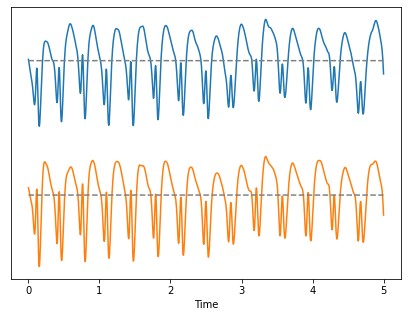

In [6]:
plot_series(data[:, :2], sr)


In [7]:
data_fft = fft(data, axis=0)

data_fft.shape


(1280, 2)

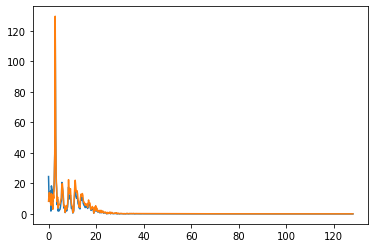

In [8]:
rows = data.shape[0]
freqs  = (sr/2)*linspace(0, 1, rows//2)
amplitude = (2.0 / rows) * abs(data_fft[:rows//2, :])

fig, ax = subplots()

ax.plot(freqs, amplitude);


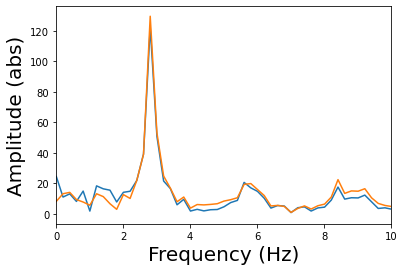

In [9]:
fig, ax = subplots()

ax.plot(freqs, amplitude);

ax.set_xlim(0, 10);
ax.set_xlabel('Frequency (Hz)', fontsize=20)
ax.set_ylabel('Amplitude (abs)', fontsize=20);
